# Diabities Dataset B

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,BatchNormalization,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
import pandas as pd

Using TensorFlow backend.


In [5]:
d=pd.read_excel(r"C:\Users\hamza jamil\Desktop\Diabites Model\Diabites B.xlsx")
d.head()

,age,daistolic,oldpeak,glucose_con,Diab_pred,thickness,pregnan,label
0,63,145,2.3,148,0.627,233,6,1
1,37,130,3.5,85,0.351,250,1,0
2,41,130,1.4,183,0.672,204,8,1
3,56,120,0.8,89,0.167,236,1,0
4,57,120,0.6,137,2.288,354,0,1


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
age            303 non-null int64
daistolic      303 non-null int64
oldpeak        303 non-null float64
glucose_con    303 non-null int64
Diab_pred      303 non-null float64
thickness      303 non-null int64
pregnan        303 non-null int64
label          303 non-null int64
dtypes: float64(2), int64(6)
memory usage: 19.1 KB


#  correlation matrix

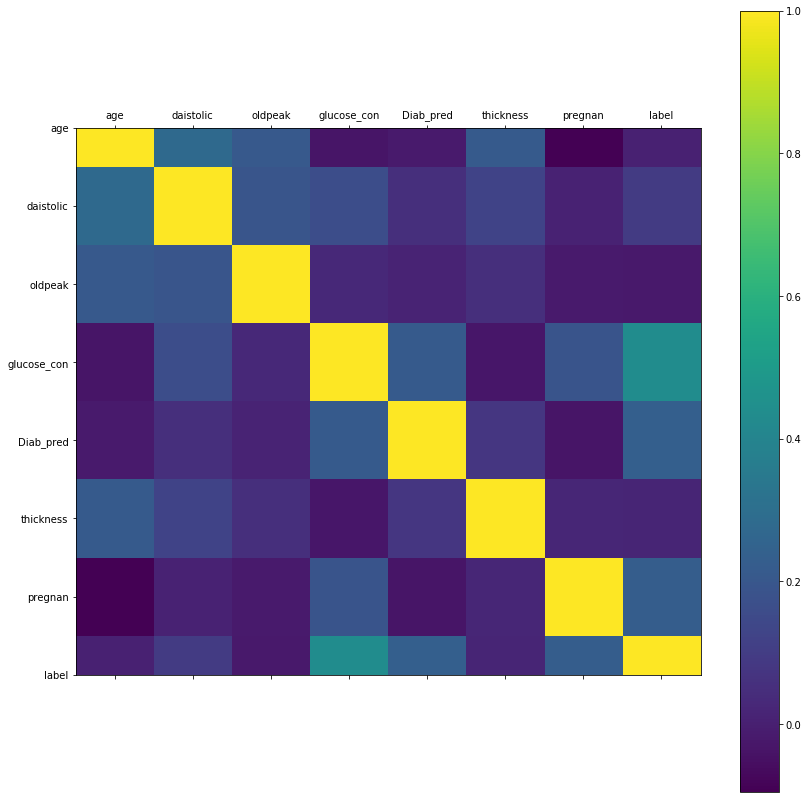

In [7]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as Featuree
from matplotlib.cm import rainbow
%matplotlib inline
rcParams['figure.figsize'] = 20, 14
plt.matshow(d.corr())
plt.yticks(np.arange(d.shape[1]), d.columns)
plt.xticks(np.arange(d.shape[1]), d.columns)
plt.colorbar()

#  First we sort instance by age

In [8]:
data=d.sort_values(by=['age'])
data.head()               #here we sort data by Age

,age,daistolic,oldpeak,glucose_con,Diab_pred,thickness,pregnan,label
72,29,130,0.0,126,0.583,204,13,1
58,34,118,0.0,146,1.781,182,0,0
125,34,118,0.7,88,0.496,210,1,1
239,35,126,0.0,104,0.582,282,0,0
65,35,138,1.4,99,0.203,183,5,0


#  Now here we drop duplicate value in our data

In [9]:
dup=data.drop_duplicates(keep=False,inplace=True)
dup                   #here we use drop_duplicate method to drop duplcate value but here we have not duplicate value

In [10]:
len(data)

303

#  here we check missing value in our data

In [11]:
data.isnull().values.any() #here we see we have no any null value

False

# here we checking NAN N/A value in our data 

In [12]:
dro=data.dropna()
dro.head()    

,age,daistolic,oldpeak,glucose_con,Diab_pred,thickness,pregnan,label
72,29,130,0.0,126,0.583,204,13,1
58,34,118,0.0,146,1.781,182,0,0
125,34,118,0.7,88,0.496,210,1,1
239,35,126,0.0,104,0.582,282,0,0
65,35,138,1.4,99,0.203,183,5,0


#  Here we Distribute our dataset in two group

In [13]:
#first we distribute our dataset into two variable 
x=dro.drop(['label','age'],axis='columns').values 
                                 
y=dro.label.values


#  Here we Normalized our Datasets


In [14]:
# Now we Normalze our dataset
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Norm=pd.DataFrame(x_scaled,index=dro.index,columns=dro.columns[0:6])
Norm['age']=dro["age"]
Norm['label']=dro['label']
Norm.head()

#after the normalization we apply squirel algorithm to find the feature

,age,daistolic,oldpeak,glucose_con,Diab_pred,thickness,label
72,29,0.000000,0.639594,0.224345,0.178082,0.764706,1
58,34,0.000000,0.741117,0.756553,0.127854,0.000000,0
125,34,0.112903,0.446701,0.185695,0.191781,0.058824,1
239,35,0.000000,0.527919,0.223900,0.356164,0.000000,0
65,35,0.225806,0.502538,0.055531,0.130137,0.294118,0


#  Here we identify our important features to the help of Algorithm

C:\Users\hamza jamil\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


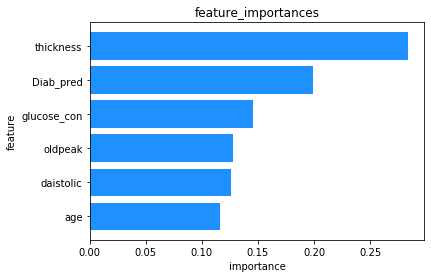

In [15]:
#here we creare functoin for Squireel Search Algorithm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
def Squirrel(algo_namem,features_nums):
    sfs_name=SFS(algo_namem, 
                k_features=features_nums, 
                forward=True, 
                floating=False,)
    return sfs_name
Squirrel=Featuree()
Squirrel.fit(x,y)
feature_importance = Squirrel.feature_importances_
feat_importances = pd.Series(Squirrel.feature_importances_, d.columns[0:6])
feat_importances = feat_importances.nlargest(13)

feature = d.columns.values.tolist()[0:6]
importance = sorted(Squirrel.feature_importances_.tolist())


x_pos = [i for i, _ in enumerate(feature)]

plt.barh(x_pos, importance , color='dodgerblue')
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")

plt.yticks(x_pos, feature)

plt.show()

In [16]:
# now here we pick up the feature with given visualization grap
x=Norm.drop(["label"],axis='columns')
y=Norm.label
x.head()

,age,daistolic,oldpeak,glucose_con,Diab_pred,thickness
72,29,0.000000,0.639594,0.224345,0.178082,0.764706
58,34,0.000000,0.741117,0.756553,0.127854,0.000000
125,34,0.112903,0.446701,0.185695,0.191781,0.058824
239,35,0.000000,0.527919,0.223900,0.356164,0.000000
65,35,0.225806,0.502538,0.055531,0.130137,0.294118


#  here we Split Our dataset into training & testing

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)


#  here we Apply Artifical Neural Network

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,BatchNormalization,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils

#  Here we create Neuron for our ANN¶

In [19]:
#here we create Neural Network Layer
model = Sequential()
model.add(Dense(6, input_dim=6, init='uniform', activation='relu'))
model.add(Dense(30,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

W0307 15:32:31.032947  7912 module_wrapper.py:139] From C:\Users\hamza jamil\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\hamza jamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, input_dim=6, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0307 15:32:31.059875  7912 module_wrapper.py:139] From C:\Users\hamza jamil\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0307 15:32:31.067853  7912 module_wrapper.py:139] From C:\Users\hamza jamil\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [20]:
model.summary()  #this is our summary of neuron in ANN

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


#  Here we compile our model with Binary Cross Entropy

In [22]:
#here we compile our ANN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


#  Training Phase 

In [52]:
de=model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=5)
de

Train on 212 samples, validate on 91 samples
Epoch 1/30
175/212 [=======================>......] - ETA: 0s - loss: 0.5251 - acc: 0.7257

C:\Users\hamza jamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


212/212 [==============================] - 0s 1ms/step - loss: 0.5424 - acc: 0.7123 - val_loss: 0.5560 - val_acc: 0.7473
Epoch 2/30
212/212 [==============================] - 0s 406us/step - loss: 0.5407 - acc: 0.7075 - val_loss: 0.5666 - val_acc: 0.7363
Epoch 3/30
212/212 [==============================] - 0s 425us/step - loss: 0.5555 - acc: 0.7075 - val_loss: 0.5541 - val_acc: 0.7582
Epoch 4/30
212/212 [==============================] - 0s 551us/step - loss: 0.5550 - acc: 0.6981 - val_loss: 0.5557 - val_acc: 0.7473
Epoch 5/30
212/212 [==============================] - 0s 385us/step - loss: 0.5640 - acc: 0.7075 - val_loss: 0.5588 - val_acc: 0.7582
Epoch 6/30
212/212 [==============================] - 0s 400us/step - loss: 0.5446 - acc: 0.7075 - val_loss: 0.5584 - val_acc: 0.7473
Epoch 7/30
212/212 [==============================] - 0s 561us/step - loss: 0.5322 - acc: 0.7311 - val_loss: 0.5562 - val_acc: 0.7582
Epoch 8/30
212/212 [==============================] - 0s 674us/step - loss:

 # Model Accuracy 

In [53]:
scores = model.evaluate(X_test, y_test)

print("accuracy: %.2f%%" %(scores[1]*100))

91/91 [==============================] - 0s 87us/step
accuracy: 73.63%


#  Testing Phase or Prediction phase

In [54]:
Y_pred=model.predict(X_test)
Y_pred# ths is our testing Phase

array([[0.3646938 ],
       [0.29380322],
       [0.546757  ],
       [0.27011046],
       [0.43717825],
       [0.75647414],
       [0.5377551 ],
       [0.5339419 ],
       [0.17927542],
       [0.8291359 ],
       [0.6496986 ],
       [0.7514237 ],
       [0.5301276 ],
       [0.72052586],
       [0.2545392 ],
       [0.27621824],
       [0.37773108],
       [0.44797134],
       [0.17161307],
       [0.6817057 ],
       [0.47743067],
       [0.61173654],
       [0.22412938],
       [0.49512303],
       [0.34631762],
       [0.5276679 ],
       [0.32342553],
       [0.41345286],
       [0.49109387],
       [0.5176492 ],
       [0.58519214],
       [0.6486966 ],
       [0.48172197],
       [0.5934213 ],
       [0.12012774],
       [0.6065946 ],
       [0.30639052],
       [0.78440297],
       [0.29508072],
       [0.52610844],
       [0.65200055],
       [0.43537003],
       [0.43228388],
       [0.6449145 ],
       [0.30330375],
       [0.7651756 ],
       [0.6355621 ],
       [0.390

In [55]:
pred_cl=model.predict_classes(X_test) # ths is our testing Phase
pred_cl

array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
    

#  Classfication report of our Model with precision, recall, accuracy

In [56]:
from sklearn.metrics import classification_report,confusion_matrix
targe = ['Patient 1', 'Not Patient 0']
print(classification_report(y_test,pred_cl,target_names=targe))

               precision    recall  f1-score   support

    Patient 1       0.80      0.74      0.77        54
Not Patient 0       0.66      0.73      0.69        37

     accuracy                           0.74        91
    macro avg       0.73      0.74      0.73        91
 weighted avg       0.74      0.74      0.74        91



#  Instance Evaluation to the help of Confusion Metrix


confusion metrix without normalize
[[40 14]
 [10 27]]


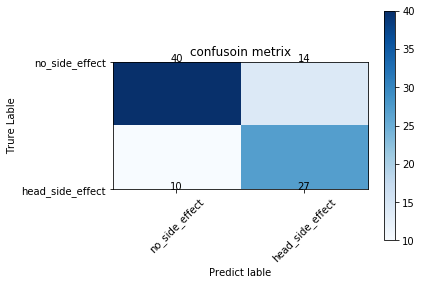

In [57]:
from sklearn.metrics import confusion_matrix
import itertools
cm=confusion_matrix(y_test,pred_cl)

def go(cm,classes,title='CONFUSOIN METRIX',normalize=False,cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_mark=np.arange(len(classes))
    plt.xticks(tick_mark,classes,rotation=45)
    plt.yticks(tick_mark,classes)
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalize cnfusion metrix")
    else:
        
        print("confusion metrix without normalize")
    print(cm)    
    thresh=cm.max() / 1
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('Trure Lable')
    plt.xlabel('Predict lable')
        
    
cm_lable=['no_side_effect','head_side_effect']    
go(cm,cm_lable,title='confusoin metrix')
    
   
    


#  ANN Model Loss visualization

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


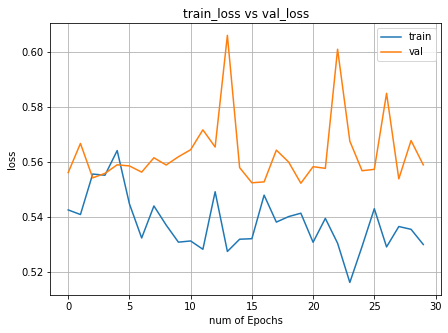

In [58]:
nb_epoch=30
train_loss=de.history['loss']
val_loss=de.history['val_loss']
train_acc=de.history['acc']
val_acc=de.history['val_acc']
xc=range(nb_epoch)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print(plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


#  ANN Model Accuracy visualization

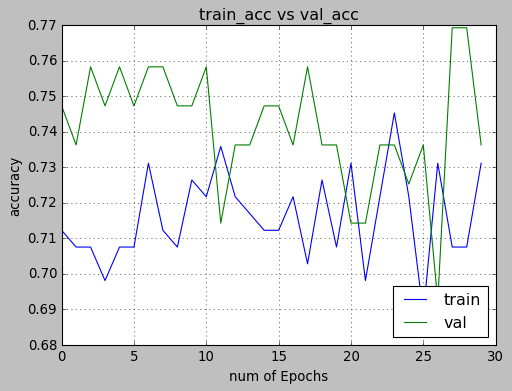

In [59]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

#  Now we apply DLMNN [Deep learning Modifed Neural Network]
1
​

In [23]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,BatchNormalization,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils

#  Here we create Deep Neuron for DLMNN

In [25]:
mode = Sequential()
mode.add(Dense(6, input_dim=6, init='uniform', activation='relu'))
mode.add(Dense(30,  activation='relu'))
mode.add(Dense(40,  activation='relu'))
mode.add(Dense(50,  activation='relu'))
mode.add(Dense(60,  activation='relu'))
mode.add(Dense(70,  activation='relu'))
mode.add(Dense(80,  activation='relu'))
mode.add(Dense(1,  activation='sigmoid'))

C:\Users\hamza jamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, input_dim=6, activation="relu", kernel_initializer="uniform")`
  


In [26]:
mode.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_13 (Dense)             (None, 30)                210       
_________________________________________________________________
dense_14 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2050      
_________________________________________________________________
dense_16 (Dense)             (None, 60)                3060      
_________________________________________________________________
dense_17 (Dense)             (None, 70)                4270      
_________________________________________________________________
dense_18 (Dense)             (None, 80)                5680      
__________

#  # DLMNN Complile with binary  Entropy

In [27]:
mode.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#  Model Training Phase

In [30]:
g=mode.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=42, batch_size=7)
g

Train on 212 samples, validate on 91 samples
Epoch 1/42
212/212 [==============================] - 0s 623us/step - loss: 0.6171 - acc: 0.6651 - val_loss: 0.6438 - val_acc: 0.6374
Epoch 2/42
119/212 [===============>..............] - ETA: 0s - loss: 0.5710 - acc: 0.7143

C:\Users\hamza jamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


212/212 [==============================] - 0s 517us/step - loss: 0.6080 - acc: 0.6745 - val_loss: 0.6448 - val_acc: 0.6044
Epoch 3/42
212/212 [==============================] - 0s 475us/step - loss: 0.6216 - acc: 0.6274 - val_loss: 0.6436 - val_acc: 0.6264
Epoch 4/42
212/212 [==============================] - 0s 510us/step - loss: 0.6465 - acc: 0.6085 - val_loss: 0.7108 - val_acc: 0.6374
Epoch 5/42
212/212 [==============================] - 0s 494us/step - loss: 0.6442 - acc: 0.7028 - val_loss: 0.6464 - val_acc: 0.6593
Epoch 6/42
212/212 [==============================] - 0s 456us/step - loss: 0.6338 - acc: 0.6462 - val_loss: 0.6515 - val_acc: 0.6264
Epoch 7/42
212/212 [==============================] - 0s 520us/step - loss: 0.6237 - acc: 0.6651 - val_loss: 0.6500 - val_acc: 0.6044
Epoch 8/42
212/212 [==============================] - 0s 481us/step - loss: 0.6338 - acc: 0.6698 - val_loss: 0.6359 - val_acc: 0.6923
Epoch 9/42
212/212 [==============================] - 0s 504us/step - los

# Model Accuracy

In [32]:
scor = mode.evaluate(X_test, y_test)

print("accuracy: %.2f%%" %(scor[1]*100))

91/91 [==============================] - 0s 77us/step
accuracy: 70.33%


#  Model Testing Phase or Prediction phase

In [33]:
p_pred=mode.predict(X_test)
p_pred

array([[0.17975205],
       [0.19079843],
       [0.23261201],
       [0.17963442],
       [0.2832912 ],
       [0.31364095],
       [0.22170913],
       [0.24784902],
       [0.17113903],
       [0.5443861 ],
       [0.37074757],
       [0.5443861 ],
       [0.22663468],
       [0.5443861 ],
       [0.24459872],
       [0.22575578],
       [0.32502717],
       [0.27889556],
       [0.13782585],
       [0.5443861 ],
       [0.49709672],
       [0.27756828],
       [0.1455164 ],
       [0.16943711],
       [0.21512586],
       [0.24991786],
       [0.1693961 ],
       [0.15663803],
       [0.29681993],
       [0.3465362 ],
       [0.27789468],
       [0.23657614],
       [0.26096314],
       [0.5443861 ],
       [0.13087645],
       [0.25750232],
       [0.13873938],
       [0.5443861 ],
       [0.18050429],
       [0.24078259],
       [0.5443861 ],
       [0.32310593],
       [0.26808718],
       [0.23780987],
       [0.25329337],
       [0.5443861 ],
       [0.3619383 ],
       [0.213

In [35]:
pre_cl=mode.predict_classes(X_test) # ths is our testing Phase


#  Classfication report of our Model with precision, recall, accuracy


In [99]:
from sklearn.metrics import classification_report,confusion_matrix
targe = ['Patient 1', 'Not Patient 0']
print(classification_report(y_test,pre_cl,target_names=targe))

               precision    recall  f1-score   support

    Patient 1       0.72      0.81      0.77        54
Not Patient 0       0.67      0.54      0.60        37

     accuracy                           0.70        91
    macro avg       0.69      0.68      0.68        91
 weighted avg       0.70      0.70      0.70        91



#  Instance Evaluation to the help of Confusion Metrix

confusion metrix without normalize
[[44 10]
 [17 20]]


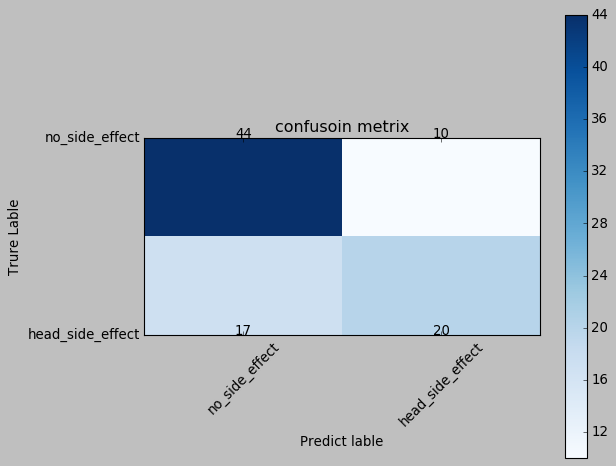

In [100]:
from sklearn.metrics import confusion_matrix
import itertools
cm=confusion_matrix(y_test,pre_cl)

def go(cm,classes,title='CONFUSOIN METRIX',normalize=False,cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_mark=np.arange(len(classes))
    plt.xticks(tick_mark,classes,rotation=45)
    plt.yticks(tick_mark,classes)
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalize cnfusion metrix")
    else:
        
        print("confusion metrix without normalize")
    print(cm)    
    thresh=cm.max() / 1
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('Trure Lable')
    plt.xlabel('Predict lable')
        
    
cm_lable=['no_side_effect','head_side_effect']    
go(cm,cm_lable,title='confusoin metrix')
    

#  DLMNN Model Loss visualization

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


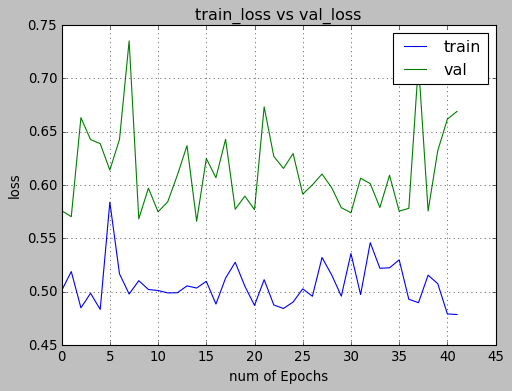

In [102]:
nb_epoch=42
train_los=g.history['loss']
val_los=g.history['val_loss']
train_ac=g.history['acc']
val_ac=g.history['val_acc']
xd=range(nb_epoch)
plt.figure(1,figsize=(7,5))
plt.plot(xd,train_los)
plt.plot(xd,val_los)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print(plt.style.available) 
plt.style.use(['classic'])

#  DLMNN Model Accuracy visualization

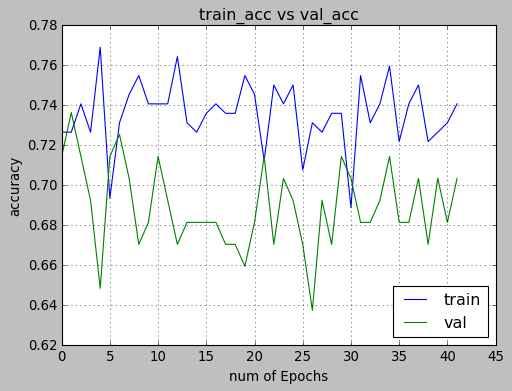

In [103]:
plt.figure(2,figsize=(7,5))
plt.plot(xd,train_ac)
plt.plot(xd,val_ac)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)

plt.style.use(['classic'])